In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import os
from src.params import PARAM_DIR, RESULTS, FIGURES_DIR
from src.utils.config import read_config_file, write_config_file
from src.fig_utils import helper_save

def calc_percentages(data,cols=("Timepoint", "Stimuli", "Genotype",
                                "Sample")):

    return data.groupby(cols).apply(lambda group: group[
        "Cluster"].value_counts(
        )).reset_index()


def plot_panel(data, f_save=None):
    """

    :param labels: 1d array corresponding to cluster labels
    :param index: 1d array corresponding to the actual raw data indices
    :param data: dataframe, which has the timepoint, stimuli,
    gene KO, and replicate
    :return:
    """

    # g = sns.FacetGrid(data, col="sex", hue="time", palette='Set1',
    #                   hue_order = ["Dinner", "Lunch"], hue_kws = dict(marker=["^", "v"]))
    # g = (g.map(plt.scatter, "total_bill", "tip").add_legend())
    #

    # Fold into percentages
    g = sns.FacetGrid(data, col="Stimuli", col_wrap=5, height=1.5)
    #g = g.map(plt.plot, "Timepoint", "percentage", marker=".")
    g = g.map(sns.lineplot, "Timepoint", "percentage",
              hue="Genotype", marker=".")

    helper_save(f_save)
    return g


def create_panel(data_f, label_f, embedding_f):
    data = pd.read_csv(data_f, sep="\t", index_col=0)
    [_, indices] = pickle.load(open(embedding_f,"rb"))
    data = data.loc[indices]

    labels = pickle.load(open(label_f.replace(".p","")+".p",'rb'))
    cluster_labels = np.unique(labels)
    data["Cluster"] = cluster_labels

    perc = calc_percentages(data, cols=("Timepoint", "Stimuli",
                                   "Genotype", "Sample"))

    plot_panel(perc, f_save=None)
    return


def all_filenames(p):
    for stage in p["stages"]:
        p = create_filenames(p, stage)
    return p


def create_filenames(p, stage):
    stage_p = p[stage]

    if stage == "data" or stage == "umap":
        return p

    p[stage]["data_folder"] = os.path.join(RESULTS, stage,
                                           stage_p["folder"])
    p[stage]["figure_folder"] = os.path.join(FIGURES_DIR, stage,
                                           stage_p["folder"])

    for f in p[stage]["filenames"]:
        p[stage]["filenames"][f] = os.path.join(p[stage][
                                                    "data_folder"],
                                                p[stage][
                                                    "filenames"][f])

    for f in p[stage]["figures"]:
        p[stage]["figures"][f] = os.path.join(p[stage][
                                                    "figure_folder"],
                                                p[stage][
                                                    "figures"][f])

    if not os.path.exists(p[stage]["data_folder"]):
        os.makedirs(p[stage]["data_folder"])
    if not os.path.exists(p[stage]["figure_folder"]):
        os.makedirs(p[stage]["figure_folder"])

    return p


def main(config):
    p = read_config_file(config)
    p = all_filenames(p)
    create_panel(data_f=p["data"]["filenames"]["meta"],
                 label_f=p["cluster"]["filenames"]["results"],
                 embedding_f = p["umap"]["filenames"]["embedding"])

    write_config_file(
        os.path.join(p["plot_panels"]["data_folder"], "input.yaml"), p)


    return



Project Directory: /data2/isshamie/time_neutrophils

Config paths:
__name__ src.params
__package__ src
__file__ /data2/isshamie/time_neutrophils/src/params.py
__cached__ /data2/isshamie/time_neutrophils/src/__pycache__/params.cpython-37.pyc
path /data2/isshamie/time_neutrophils/src/params.py
DATA_DIR /data2/isshamie/time_neutrophils/data
PROCESSED /data2/isshamie/time_neutrophils/data/processed
PARAM_DIR /data2/isshamie/time_neutrophils/parameters
RESULTS /data2/isshamie/time_neutrophils/results
FIGURES_DIR /data2/isshamie/time_neutrophils/figures


In [2]:
config = os.path.join(PARAM_DIR, "params_sample_1.yaml")
p = read_config_file(config)
p = all_filenames(p)

data_f=p["data"]["filenames"]["meta"]
label_f=p["cluster"]["filenames"]["results"]
embedding_f = p["umap"]["filenames"]["embedding"]

cols=("Timepoint", "Stimuli", "Genotype", "Sample")

data = pd.read_csv(data_f, sep="\t", index_col=0)
[_, indices] = pickle.load(open(embedding_f,"rb"))
data = data.loc[indices]

labels = pickle.load(open(label_f.replace(".p","")+".p",'rb'))
cluster_labels = np.unique(labels)
data["Cluster"] = labels


In [38]:
df = data.groupby(cols).apply(lambda group: (group[
        "Cluster"].value_counts(
        )/len(group)).rename_axis('Label')).reset_index()
df

/home/isshamie/software/anaconda2/envs/umap/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,Timepoint,Stimuli,Genotype,Sample,Label,Cluster
0,1,A,Pad4KO,6,2,0.944444
1,1,A,Pad4KO,6,0,0.055556
2,1,A,Pad4KO,7,2,0.894737
3,1,A,Pad4KO,7,1,0.052632
4,1,A,Pad4KO,7,0,0.052632
...,...,...,...,...,...,...
8149,46,H,WT,1,0,1.000000
8150,46,H,WT,2,0,1.000000
8151,46,H,WT,3,0,1.000000
8152,46,H,WT,4,0,1.000000


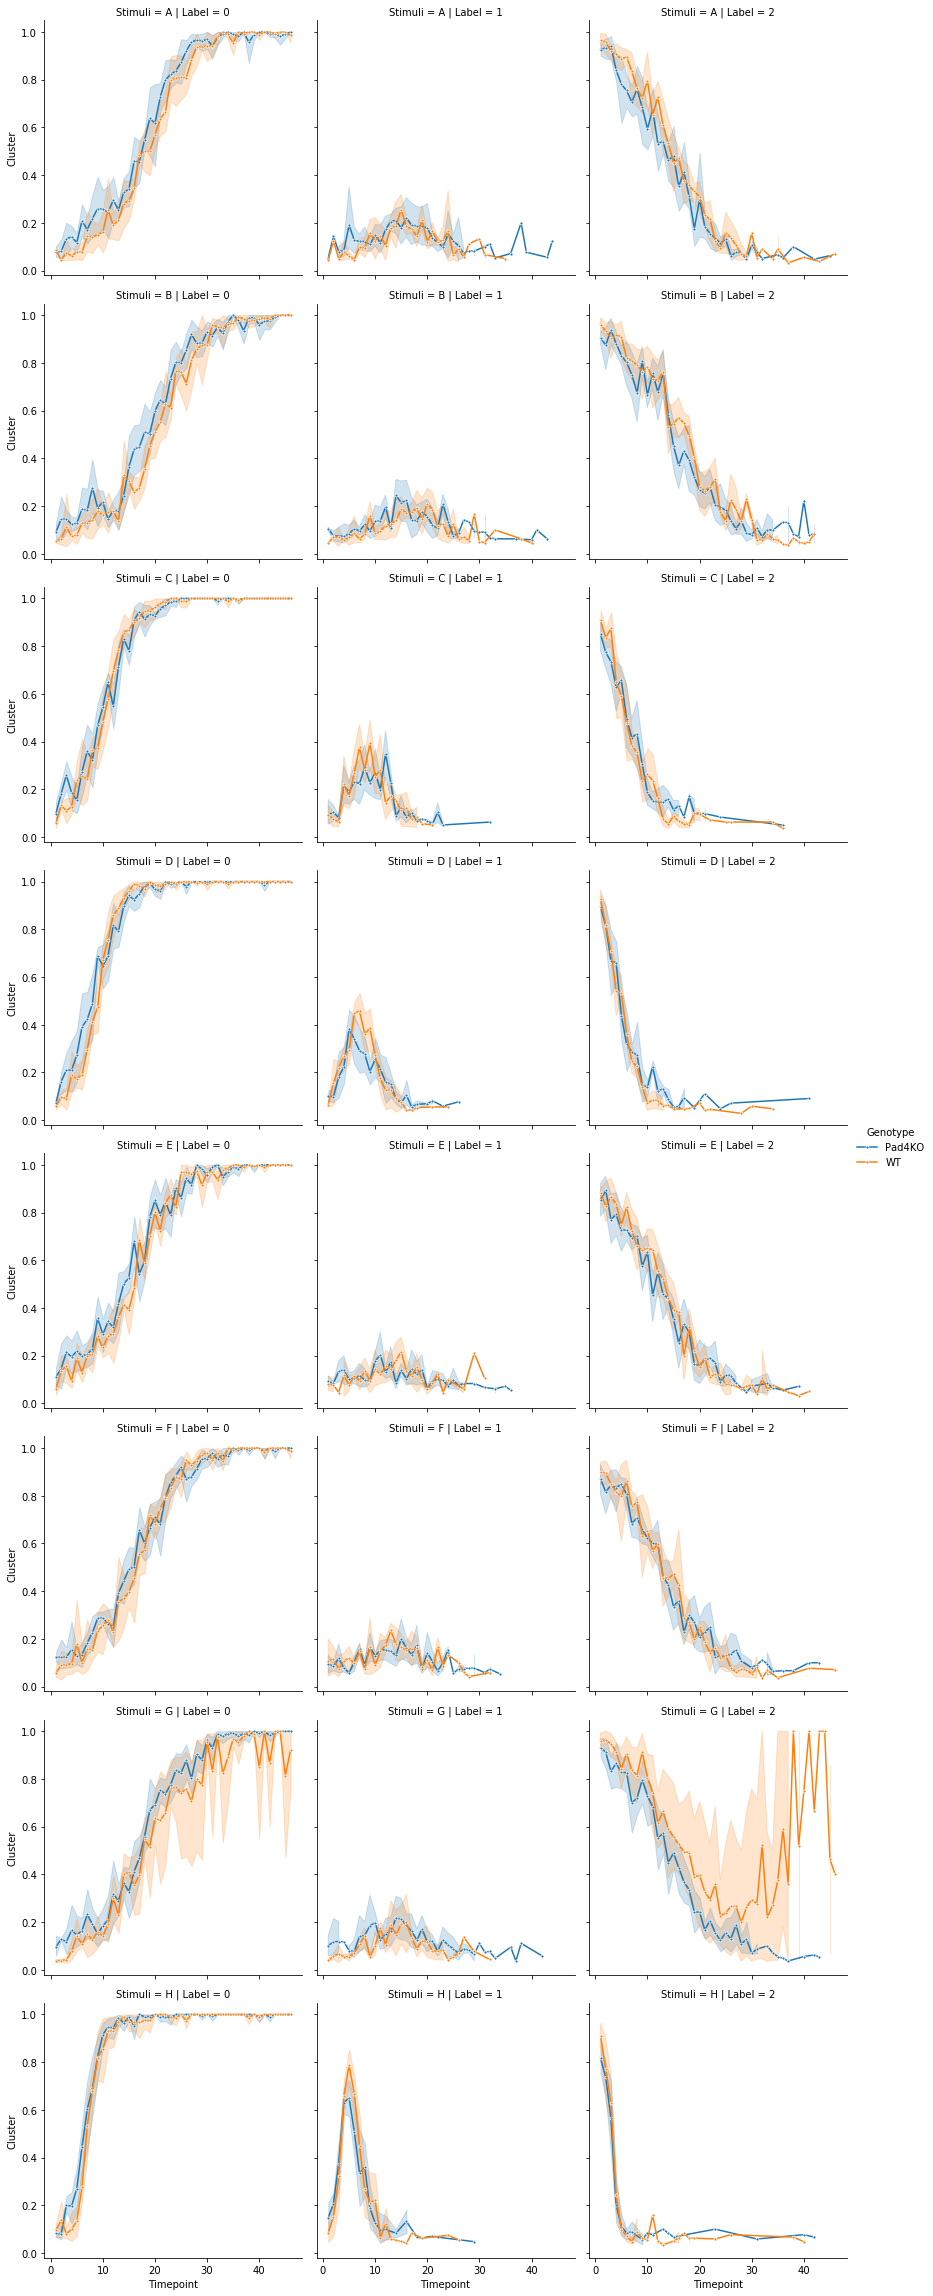

In [49]:
g = sns.FacetGrid(df, row="Stimuli",col="Label", height=4,hue="Genotype")
g = g.map(sns.lineplot, "Timepoint", "Cluster", marker=".").add_legend()
g.add_legend(label_order=g.hue_names)

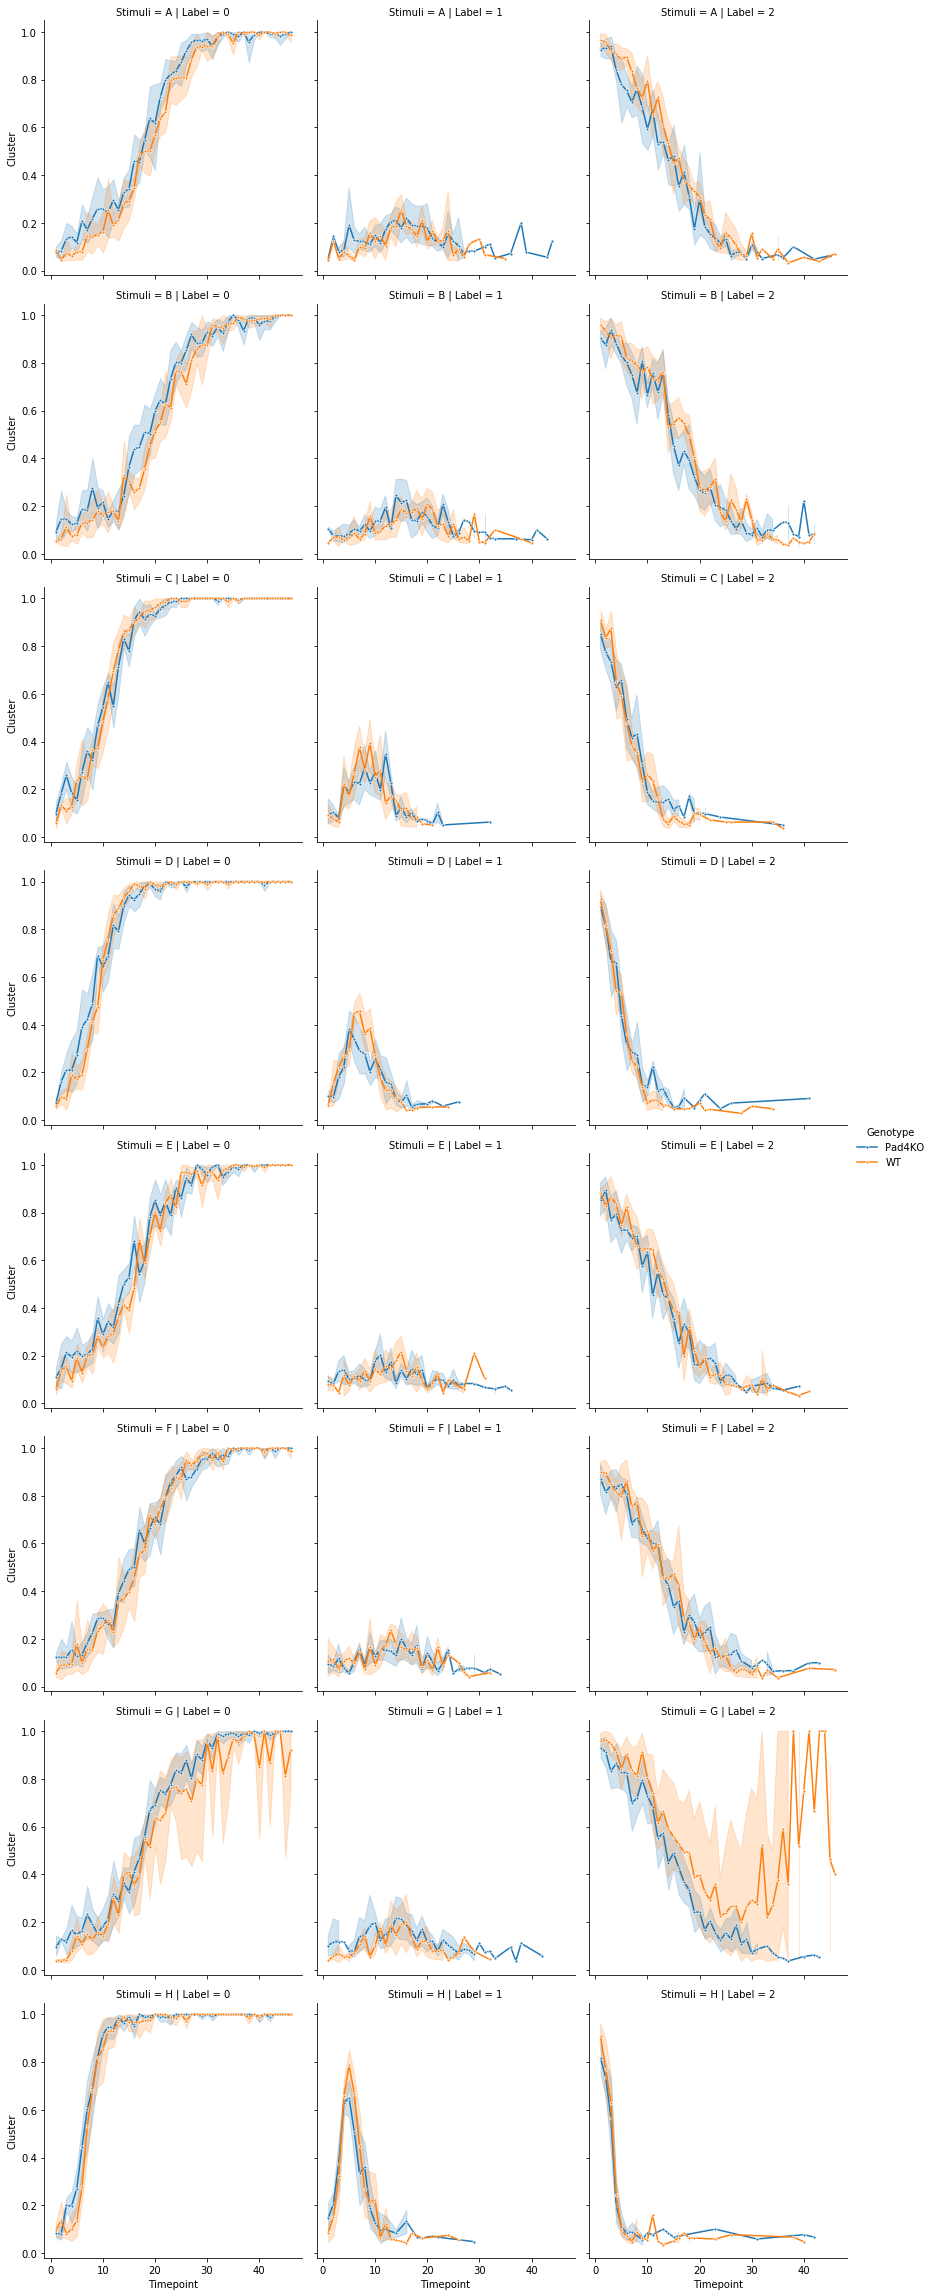

In [67]:
g = sns.FacetGrid(df, row="Stimuli",col="Label", height=4,hue="Genotype")
g = g.map(sns.lineplot, "Timepoint", "Cluster", marker=".").add_legend()